In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc = BrainObservatoryCache()

In [2]:
oeid = 501794235

In [3]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=oeid)

In [4]:
from allensdk.brain_observatory.natural_scenes import NaturalScenes
ns = NaturalScenes(data_set)

In [5]:
sweep_response = ns.sweep_response

In [6]:
stim_table = data_set.get_stimulus_table('natural_scenes')

In [7]:
image = 40

In [8]:
sweeps = sweep_response[stim_table['frame']==image]

In [9]:
sweeps.shape

(50, 153)

In [10]:
import numpy as np
sweep_tensor = np.array(sweeps.values.tolist())

In [11]:
sweep_tensor.shape

(50, 153, 63)

In [12]:
mean_sweeps = sweep_tensor.mean(axis=0)

In [13]:
mean_sweeps.min()

-13.952503509521485

In [14]:
mean_sweeps.max()

56.698078384399416

In [15]:
mean_sweeps /= mean_sweeps.max()

In [16]:
mean_sweeps.min()

-0.24608423966200135

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:

for ii, cell_response in enumerate(mean_sweeps):
    peak_loc = np.argmax(cell_response)

In [19]:
peak_loc = np.apply_along_axis(
    func1d=np.argmax,
    axis=1,
    arr=mean_sweeps,
)
peak_loc

array([14, 40, 46, 56, 41, 25, 32, 12, 18, 31, 43, 19, 62, 25, 43, 43, 27,
       42, 57, 58, 55, 49, 46, 56, 29, 58, 58, 58, 49, 39, 45, 28, 46,  9,
        8, 46, 43, 62,  1, 62, 47, 18,  2, 46,  3, 42,  0, 45, 13, 46, 41,
       40, 32, 48, 37, 28,  2,  1, 62, 50, 45,  4, 57, 35, 40, 58, 54, 46,
       38, 54, 57, 60, 40, 40, 46, 62, 29, 50, 11, 40, 51, 53, 48, 27, 57,
       40, 60, 47, 19, 27, 12, 36, 37, 26, 12, 49, 43, 56, 40, 36, 52, 42,
       32, 30, 62, 10, 28,  5, 58, 55, 43, 20, 18, 51, 22, 42, 45, 46, 45,
        6,  6, 38, 38, 60, 12, 58, 33, 20, 30, 62, 15, 56, 43, 54, 55, 57,
       41, 18, 35, 24, 21, 49, 34, 12, 31, 53, 31, 55, 16, 61, 18, 44, 43],
      dtype=int64)

In [20]:
order = np.argsort(peak_loc)

In [21]:
mean_sweeps = mean_sweeps[order,:]

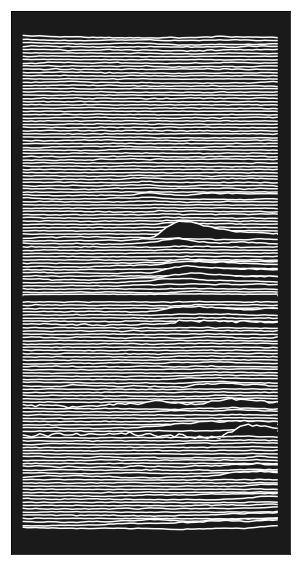

In [22]:

scale_factor = 5
    
f, ax = plt.subplots(figsize=(5,10))

background = '0.1'
linecolor = 'white'

ax.set_facecolor(background)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for ii, cell_response in enumerate(mean_sweeps):
    x = np.arange(cell_response.shape[0])
    y = -ii + cell_response * scale_factor
    ax.plot(x,y,color=linecolor,zorder=ii,)
    ax.fill_between(x,-ii,y,zorder=ii,facecolor=background)
    
    
# plt.axis('off')